<a href="https://colab.research.google.com/github/rahiakela/mlops-research-and-practice/blob/main/interpretable-machine-learning-with-python/01_weight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Weight Prediction

In [ ]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

##Dataset

In [ ]:
url = "http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights"
height_weight_df = pd.read_html(url)[1][["Height(Inches)", "Weight(Pounds)"]]

In [ ]:
# Count Records
num_records = len(height_weight_df)
print(num_records)

200


In [ ]:
# Place in x and y variables
x = height_weight_df["Height(Inches)"].values.reshape(num_records, 1)
y = height_weight_df["Weight(Pounds)"].values.reshape(num_records, 1)

##Modeling

In [ ]:
# fit data to model
model = linear_model.LinearRegression().fit(x, y)

In [ ]:
# let's see extract the intercept and coefficients
print(f"ŷ = {str(model.intercept_[0])} + {str(model.coef_.T[0][0])} x1")

ŷ = -106.02770644878137 + 3.4326761292716297 x1


In [ ]:
# let's measure the deviation between the predicted values and the actual values
y_pred = model.predict(x)
mae = mean_absolute_error(y, y_pred)
print(mae)

7.7587373803882205


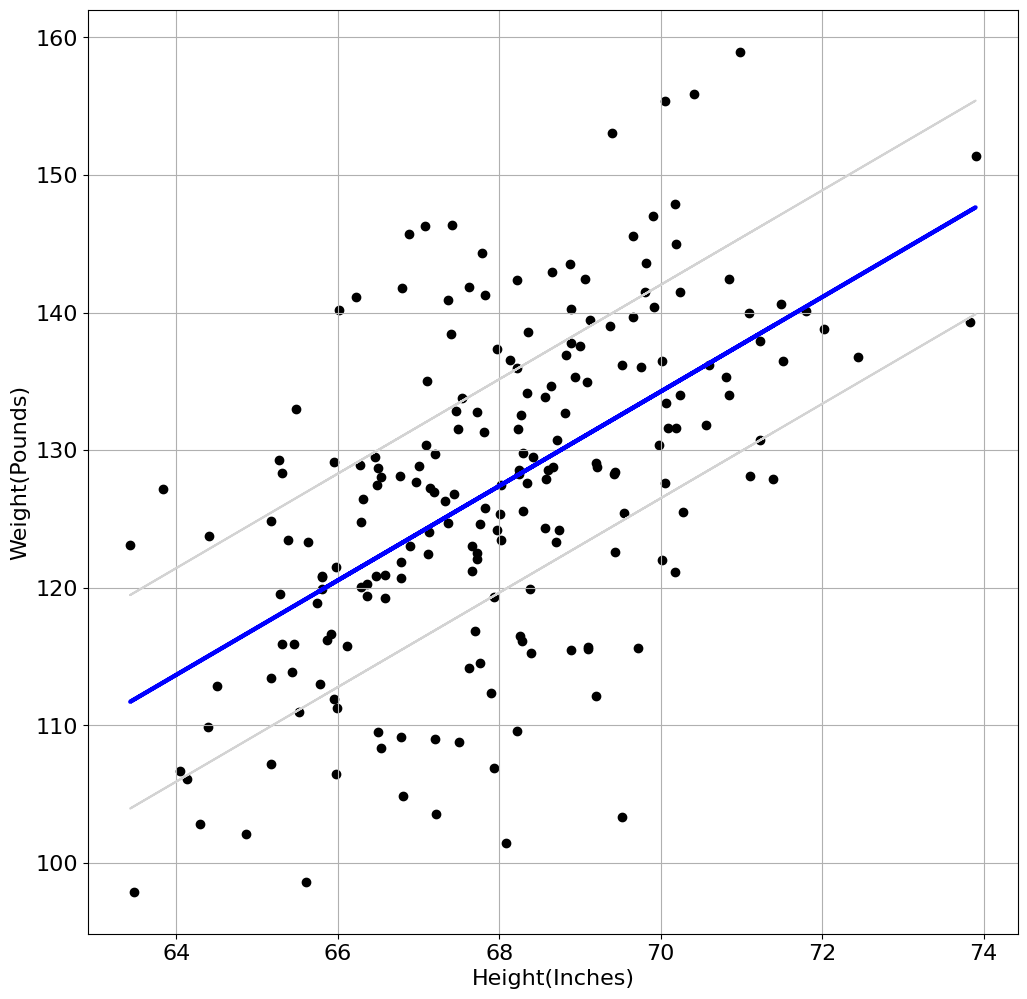

In [ ]:
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 16})
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.plot(x, y_pred + mae, color='lightgray')
plt.plot(x, y_pred - mae, color='lightgray')
plt.title('')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.grid(True)
plt.show()

##Linear Correlation

In [ ]:
# let's measure this relationship’s strength is with Pearson’s correlation coefficient
corr, pval = pearsonr(x[:, 0], y[:, 0])
print(corr)

0.5568647346122995


In [ ]:
# let's check p-value for testing non-correlation.
# If we test that it’s less than a threshold of 5%, we can say there’s sufficient evidence of this correlation
print(pval < 0.05)

True
